<a href="https://colab.research.google.com/github/GabrielaRomoM/SIGNALS-THEORY_2024-1/blob/main/ST_080324.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

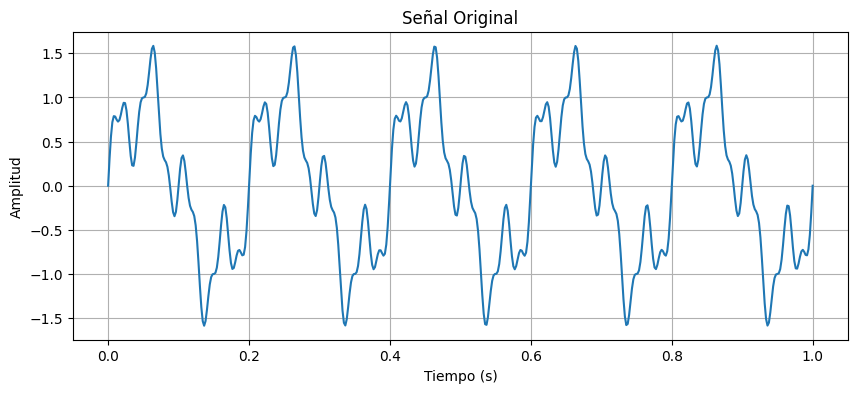

In [ ]:
t = np.linspace(0,1,500) #Vector de tiempo

#Frecuencias de las señales sinusoidales
frecuencia1 = 5
frecuencia2 = 20
frecuencia3 = 50

#Amplitudes de las señales sinusoidales
amplitud1 = 1
amplitud2 = 0.5
amplitud3 = 0.2

#Señal
senal = (amplitud1 * np.sin(2 * np.pi * frecuencia1 * t) +
         amplitud2 * np.sin(2 * np.pi * frecuencia2 * t) +
         amplitud3 * np.sin(2 * np.pi * frecuencia3 * t))

plt.figure(figsize = (10,4))
plt.plot(t,senal)
plt.title('Señal Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

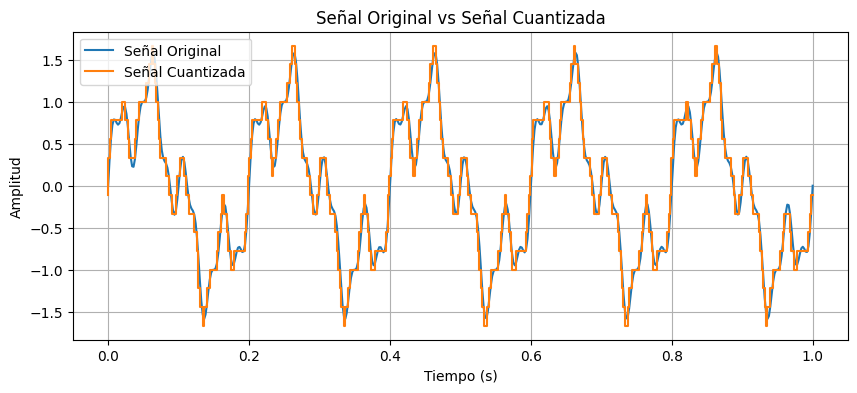

In [ ]:
#Cuantización de la señal
num_niveles = 10
senal_cuantizada = np.round((senal + 1) * (num_niveles - 1)/2) * (2/(num_niveles - 1))-1

plt.figure(figsize = (10,4))
plt.plot(t,senal, label = 'Señal Original')
plt.step(t,senal_cuantizada,label = 'Señal Cuantizada')
plt.title('Señal Original vs Señal Cuantizada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()

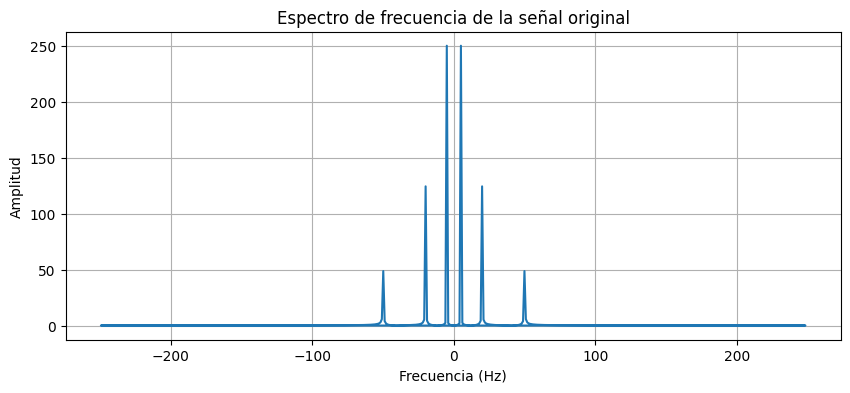

In [ ]:
# Calcular la transformada rápida de Fourier
fft_senal = np.fft.fft(senal)
frecuencias = np.fft.fftfreq(t.size, d=t[1]-t[0])

plt.figure(figsize=(10,4))
plt.plot(frecuencias, np.abs(fft_senal))
plt.title('Espectro de frecuencia de la señal original')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

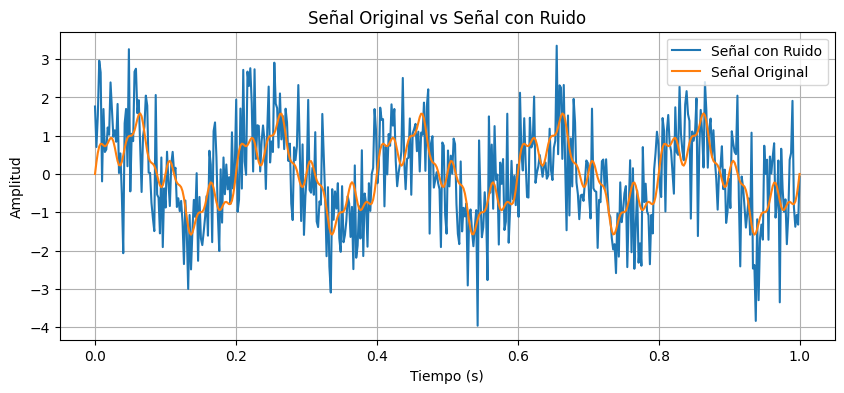

In [ ]:
# Generamos ruido
np.random.seed(0)
ruido = np.random.normal(0,1,senal.shape)

#Señal con ruido
senal_ruido = senal + ruido

plt.figure(figsize=(10,4))
plt.plot(t,senal_ruido,label = 'Señal con Ruido')
plt.plot(t,senal,label = 'Señal Original')
plt.title('Señal Original vs Señal con Ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

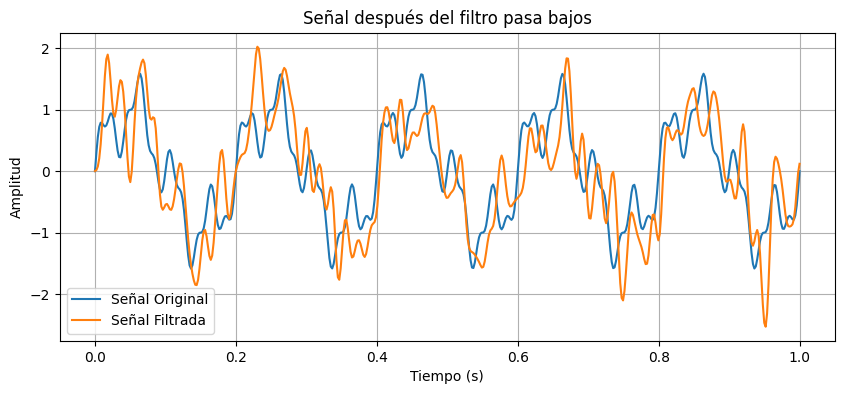

In [ ]:
from scipy.signal import butter,lfilter

#Función para crear el filtro pasa bajas
def butter_lowpass_filter(data, cutoff, fs, order=5):
  nyq = 0.5 * fs
  normal_cutoff = cutoff/nyq
  b,a = butter(order,normal_cutoff,btype = 'low', analog= False)
  y = lfilter(b,a,data)
  return y

#Aplicar el filtro pasa bajas
cutoff = 10
senal_filtrada = butter_lowpass_filter(senal_ruido, cutoff, frecuencia3*2)

plt.figure(figsize=(10,4))
plt.plot(t,senal,label='Señal Original')
plt.plot(t,senal_filtrada, label ='Señal Filtrada')
plt.title('Señal después del filtro pasa bajos')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
coeficiente_correlacion_pearson = np.corrcoef(senal, senal_filtrada)[0,1]
coeficiente_correlacion_pearson

0.7714770586589705

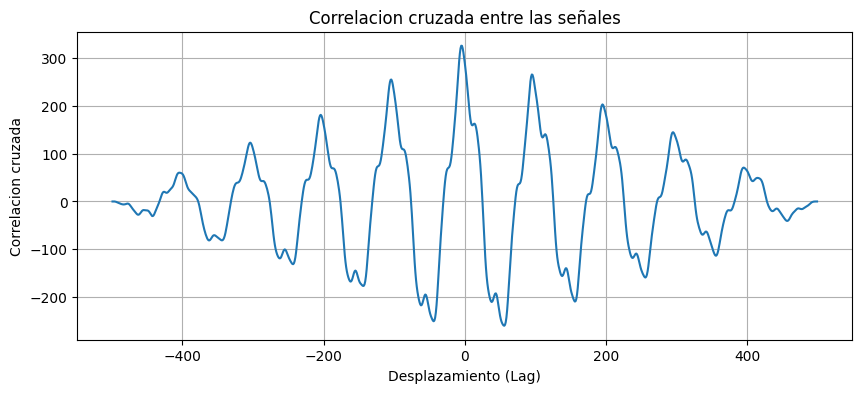

In [ ]:
# Calcular correlación cruzada
correlacion = np.correlate(senal, senal_filtrada, mode= 'full')

# Punto de máxima correlación
lag_max = np.argmax(correlacion)-(len(senal)-1)

#Visualización de la correlación cruzada
lags = np.arange(-(len(senal)-1), len(senal))
plt.figure(figsize=(10,4))
plt.plot(lags,correlacion)
plt.title('Correlacion cruzada entre las señales')
plt.xlabel('Desplazamiento (Lag)')
plt.ylabel('Correlacion cruzada')
plt.grid(True)
plt.show()